In [1]:
import pandas as pd
import numpy as np
import sqlalchemy as sql
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.plotly as py
import scipy as sp
from scipy import stats
from scipy.stats import skew, kurtosis
%matplotlib inline

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
validation_data = pd.read_csv("validation.csv")

In [3]:
train_data.describe()

,click,weekday,hour,region,city,adexchange,urlid,slotwidth,slotheight,slotprice,bidprice,payprice,advertiser
count,2.430981e+06,2.430981e+06,2.430981e+06,2.430981e+06,2.430981e+06,2.381152e+06,0.0,2.430981e+06,2.430981e+06,2.430981e+06,2.430981e+06,2.430981e+06,2.430981e+06
mean,7.375623e-04,2.888556e+00,1.348925e+01,1.493833e+02,1.543295e+02,2.109685e+00,NaN,5.774218e+02,1.885723e+02,2.671783e+01,2.729620e+02,7.815142e+01,2.840736e+03
std,2.714809e-02,2.055223e+00,6.567105e+00,1.020631e+02,1.033093e+02,8.764370e-01,NaN,3.216738e+02,1.314946e+02,3.704444e+01,2.891153e+01,5.984636e+01,7.841990e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,NaN,1.200000e+02,5.000000e+01,0.000000e+00,2.270000e+02,0.000000e+00,1.458000e+03
25%,0.000000e+00,1.000000e+00,1.000000e+01,7.900000e+01,7.900000e+01,1.000000e+00,NaN,3.000000e+02,9.000000e+01,0.000000e+00,2.410000e+02,3.300000e+01,2.259000e+03
50%,0.000000e+00,3.000000e+00,1.400000e+01,1.460000e+02,1.520000e+02,2.000000e+00,NaN,3.360000e+02,9.000000e+01,5.000000e+00,2.940000e+02,6.800000e+01,3.358000e+03
75%,0.000000e+00,5.000000e+00,1.900000e+01,2.160000e+02,2.220000e+02,3.000000e+00,NaN,9.600000e+02,2.500000e+02,5.000000e+01,3.000000e+02,9.900000e+01,3.427000e+03
max,1.000000e+00,6.000000e+00,2.300000e+01,3.950000e+02,3.990000e+02,4.000000e+00,NaN,1.000000e+03,6.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.476000e+03


In [4]:
test_data.describe()

,weekday,hour,region,city,adexchange,urlid,slotwidth,slotheight,slotprice,advertiser
count,303375.000000,303375.000000,303375.000000,303375.000000,297201.000000,0.0,303375.000000,303375.000000,303375.000000,303375.000000
mean,2.884878,13.490502,149.711410,154.646912,2.109068,NaN,577.658103,188.445735,26.666021,2840.712059
std,2.056982,6.570946,102.115339,103.334370,0.876794,NaN,321.711142,131.252709,36.916071,783.671402
min,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,120.000000,50.000000,0.000000,1458.000000
25%,1.000000,10.000000,79.000000,79.000000,1.000000,NaN,300.000000,90.000000,0.000000,2259.000000
50%,3.000000,14.000000,146.000000,152.000000,2.000000,NaN,336.000000,90.000000,5.000000,3358.000000
75%,5.000000,19.000000,216.000000,222.000000,3.000000,NaN,960.000000,250.000000,50.000000,3427.000000
max,6.000000,23.000000,395.000000,399.000000,4.000000,NaN,1000.000000,600.000000,295.000000,3476.000000


In [5]:
validation_data.describe()

,click,weekday,hour,region,city,adexchange,urlid,slotwidth,slotheight,slotprice,bidprice,payprice,advertiser
count,303925.000000,303925.000000,303925.000000,303925.000000,303925.000000,297749.000000,0.0,303925.000000,303925.000000,303925.000000,303925.000000,303925.000000,303925.000000
mean,0.000665,2.884629,13.503229,149.262009,154.187040,2.111540,NaN,578.604386,188.384108,26.863233,273.053099,78.234005,2836.377899
std,0.025772,2.053712,6.563728,102.019265,103.251439,0.875678,NaN,321.818414,131.629049,37.194999,28.892861,60.026063,786.842472
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,120.000000,50.000000,0.000000,227.000000,0.000000,1458.000000
25%,0.000000,1.000000,10.000000,79.000000,79.000000,1.000000,NaN,300.000000,90.000000,0.000000,241.000000,33.000000,2259.000000
50%,0.000000,3.000000,14.000000,146.000000,152.000000,2.000000,NaN,336.000000,90.000000,5.000000,294.000000,68.000000,3358.000000
75%,0.000000,5.000000,19.000000,216.000000,222.000000,3.000000,NaN,960.000000,250.000000,50.000000,300.000000,100.000000,3427.000000
max,1.000000,6.000000,23.000000,395.000000,399.000000,4.000000,NaN,1000.000000,600.000000,295.000000,300.000000,300.000000,3476.000000


In [6]:
train_data.head()

,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,5,22,b7bea80521fdecd95d2d761a38c91c3f09618066,2e880fb7d690cf7377b2e42e701728e3f3c0e4c1,windows_ie,125.37.175.*,2,2,2.0,...,200,2,0,5,a4f763f78ef3eedfe614263b94a8924e,238,5,0f951a030abdaedd733ee8d114ce2944,3427,NaN
1,0,1,20,4f51205475678f5a124bc76b2c54163bf8eaa7eb,3a1fe01360ff8100e7d006b83b77a3e4c01d928c,windows_chrome,171.36.92.*,238,239,1.0,...,250,FourthView,Na,0,10722,294,23,NaN,2821,NaN
2,0,3,13,b604e3fd054a658ab7ced4285ebf2ef54d2bd890,801d18a056b6fe6b06a794aef17fb0d6daff2414,windows_ie,59.46.106.*,40,41,2.0,...,250,2,0,5,798b2d49952d77f1eace9f23c210d0b5,238,24,0f951a030abdaedd733ee8d114ce2944,3427,"10052,10006,13866,10110"
3,0,6,23,0348beeae93e561584c3b50fc9e7746a33048ad7,0d6eaf2259699990e38a1fc5116f112070b9ecdc,windows_ie,114.250.226.*,1,1,1.0,...,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,25,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063,10111"
4,0,5,6,268149c1789bce2bc9798ffd97ec431219bafeb3,a239d9bb642460d974ba67f85e63b8d3e214da0e,windows_ie,183.63.192.*,216,233,2.0,...,90,OtherView,Na,133,7330,277,133,NaN,2259,NaN


In [7]:
test_data.head()

,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,domain,...,slotid,slotwidth,slotheight,slotvisibility,slotformat,slotprice,creative,keypage,advertiser,usertag
0,0,12,366c563de7d90feb9d4dab53e795a93fb3157387,75045dd2f2136c93fe55fe6c446ec1527ed8f0bb,windows_chrome,27.197.36.*,146,159,3.0,DDTSQuf0MTTNaqKIvMpENpn,...,Astro_F_Rectangle,300,250,0,0,10,00fccc64a1ee2809348509b7ac2a97a5,b2e35064f3549d447edbbdfb1f707c8c,3427,"10024,10077,10075,10063,10031,10102,10006,1304..."
1,3,14,29167d4caa719788b5a342dbaa25151d53121f80,11279eb1f8f7a88f877db911673522b6ff202aa7,android_safari,124.126.227.*,1,1,NaN,d63d96468f66986d5a8eb5225ad0b6f0,...,2745306850,320,50,FirstView,Na,5,11908,NaN,2997,NaN
2,5,19,ff8bc3f4d44a3ea60c5f3a3a8fbe7cd98fb2966e,4771a819a3f5b86776d8a9456f4f2506578f78d8,windows_ie,116.116.104.*,27,34,1.0,trqRTJkrBoq7JsNr5SqfNX,...,mm_34022157_3445226_11175100,336,280,2,1,0,77819d3e0b3467fe5c7b16d68ad923a1,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10006,10024,10059,10048,10063,10067,1008..."
3,0,21,844c2da00d45315f20b748ec131c26ee99a7cbc7,5360671379f3204afa9cc0edd8fd2e2096cb09eb,windows_ie,115.46.145.*,238,245,4.0,6d27caf5a202ec085f80af7163ef7cb0,...,210842,960,90,FirstView,Na,30,10717,NaN,2821,"10075,13042,10006,10110,13776,10031,10063"
4,2,20,c6017f0ad0c44d7d0c9b62583ea863f28941c0ca,d791b5f6306b9d299f81daa5448ced7e5bfa010f,windows_ie,221.199.203.*,27,35,3.0,3FKElpuEMusyJqKbuKz,...,Fashion_F_Rectangle,300,250,0,0,50,44966cc8da1ed40c95d59e863c8c75f0,43f4a37f42a7c5e6219e2601b26c6976,3386,10063


In [8]:
validation_data.head()

,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,4,20,bbcb813b6166538503d8b33a5602d7d72f6019dc,663169f66491c98c69f1f94a5c48fa34aa9fe06f,windows_ie,211.144.203.*,79,79,1.0,...,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,23,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10111"
1,0,1,21,5a07316c49477cb5d9b4d5aa39c27d6c3be7f92d,a23f0cfab6592c137f796e68fa752fceba08bb1b,windows_chrome,58.247.250.*,79,79,1.0,...,90,0,1,0,c938195f9e404b4f38c7e71bf50263e5,238,75,a3becb967c015e9acb5e72f22b100ef8,3476,"10075,10057,10024,10052,10083,10063,10006,10110"
2,0,4,8,f6ece71dae81d6b16bfb24ad6dd5611472d4c673,5105a013ea54a9706146033e6a138d5234a3803e,windows_ie,117.12.111.*,2,2,2.0,...,250,2,0,5,911b2d84826786018761e8c0b0a3a60c,238,65,d29e59bf0f7f8243858b8183f14d4412,3358,"13866,10024,10059,10063,13776,10083,10006,10111"
3,0,5,15,b4d5c57c9b38ff5a12954fa01e11931b4e6bfbbb,577e9a768ce17e73c61ba7022db927f9ee761830,windows_chrome,61.187.224.*,201,205,2.0,...,280,2,0,5,dc0998c10f8f0b623b5d949e8272e4c7,238,6,d29e59bf0f7f8243858b8183f14d4412,3358,"13866,10057,10006,10063,10110"
4,0,1,18,0899bf144249458ea9c89188473694bf44c7ca15,e4bf79c562745d671b19f2edf7fda89c2e25987f,windows_chrome,117.41.145.*,134,135,2.0,...,200,1,0,5,23485fcd23122d755d38f8c89d46ca56,249,5,7e0e909ea89f707bc20f9585c9072081,3476,"10006,10063,13776,10110"


In [9]:
def split_data_os(data):
    return data.split('_')[0]
def split_data_browser(data):
    return data.split('_')[1]
def create_os_browser(data):
    os = data['useragent'].apply(split_data_os)
    browser = data['useragent'].apply(split_data_browser)
    os=np.array(os)
    browser = np.array(browser)
    df_os = pd.DataFrame(columns=['OS'], data = os)
    df_browser = pd.DataFrame(columns=['Browser'], data = browser)
    data.insert(0,'OS',df_os)
    data.insert(1,'Browser',df_browser)

In [10]:
create_os_browser(train_data)
train_data.head()

,OS,Browser,click,weekday,hour,bidid,userid,useragent,IP,region,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,windows,ie,0,5,22,b7bea80521fdecd95d2d761a38c91c3f09618066,2e880fb7d690cf7377b2e42e701728e3f3c0e4c1,windows_ie,125.37.175.*,2,...,200,2,0,5,a4f763f78ef3eedfe614263b94a8924e,238,5,0f951a030abdaedd733ee8d114ce2944,3427,NaN
1,windows,chrome,0,1,20,4f51205475678f5a124bc76b2c54163bf8eaa7eb,3a1fe01360ff8100e7d006b83b77a3e4c01d928c,windows_chrome,171.36.92.*,238,...,250,FourthView,Na,0,10722,294,23,NaN,2821,NaN
2,windows,ie,0,3,13,b604e3fd054a658ab7ced4285ebf2ef54d2bd890,801d18a056b6fe6b06a794aef17fb0d6daff2414,windows_ie,59.46.106.*,40,...,250,2,0,5,798b2d49952d77f1eace9f23c210d0b5,238,24,0f951a030abdaedd733ee8d114ce2944,3427,"10052,10006,13866,10110"
3,windows,ie,0,6,23,0348beeae93e561584c3b50fc9e7746a33048ad7,0d6eaf2259699990e38a1fc5116f112070b9ecdc,windows_ie,114.250.226.*,1,...,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,25,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063,10111"
4,windows,ie,0,5,6,268149c1789bce2bc9798ffd97ec431219bafeb3,a239d9bb642460d974ba67f85e63b8d3e214da0e,windows_ie,183.63.192.*,216,...,90,OtherView,Na,133,7330,277,133,NaN,2259,NaN


In [11]:
create_os_browser(test_data)
test_data.head()

,OS,Browser,weekday,hour,bidid,userid,useragent,IP,region,city,...,slotid,slotwidth,slotheight,slotvisibility,slotformat,slotprice,creative,keypage,advertiser,usertag
0,windows,chrome,0,12,366c563de7d90feb9d4dab53e795a93fb3157387,75045dd2f2136c93fe55fe6c446ec1527ed8f0bb,windows_chrome,27.197.36.*,146,159,...,Astro_F_Rectangle,300,250,0,0,10,00fccc64a1ee2809348509b7ac2a97a5,b2e35064f3549d447edbbdfb1f707c8c,3427,"10024,10077,10075,10063,10031,10102,10006,1304..."
1,android,safari,3,14,29167d4caa719788b5a342dbaa25151d53121f80,11279eb1f8f7a88f877db911673522b6ff202aa7,android_safari,124.126.227.*,1,1,...,2745306850,320,50,FirstView,Na,5,11908,NaN,2997,NaN
2,windows,ie,5,19,ff8bc3f4d44a3ea60c5f3a3a8fbe7cd98fb2966e,4771a819a3f5b86776d8a9456f4f2506578f78d8,windows_ie,116.116.104.*,27,34,...,mm_34022157_3445226_11175100,336,280,2,1,0,77819d3e0b3467fe5c7b16d68ad923a1,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10006,10024,10059,10048,10063,10067,1008..."
3,windows,ie,0,21,844c2da00d45315f20b748ec131c26ee99a7cbc7,5360671379f3204afa9cc0edd8fd2e2096cb09eb,windows_ie,115.46.145.*,238,245,...,210842,960,90,FirstView,Na,30,10717,NaN,2821,"10075,13042,10006,10110,13776,10031,10063"
4,windows,ie,2,20,c6017f0ad0c44d7d0c9b62583ea863f28941c0ca,d791b5f6306b9d299f81daa5448ced7e5bfa010f,windows_ie,221.199.203.*,27,35,...,Fashion_F_Rectangle,300,250,0,0,50,44966cc8da1ed40c95d59e863c8c75f0,43f4a37f42a7c5e6219e2601b26c6976,3386,10063


In [12]:
create_os_browser(validation_data)
validation_data.head()

,OS,Browser,click,weekday,hour,bidid,userid,useragent,IP,region,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,windows,ie,0,4,20,bbcb813b6166538503d8b33a5602d7d72f6019dc,663169f66491c98c69f1f94a5c48fa34aa9fe06f,windows_ie,211.144.203.*,79,...,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,23,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10111"
1,windows,chrome,0,1,21,5a07316c49477cb5d9b4d5aa39c27d6c3be7f92d,a23f0cfab6592c137f796e68fa752fceba08bb1b,windows_chrome,58.247.250.*,79,...,90,0,1,0,c938195f9e404b4f38c7e71bf50263e5,238,75,a3becb967c015e9acb5e72f22b100ef8,3476,"10075,10057,10024,10052,10083,10063,10006,10110"
2,windows,ie,0,4,8,f6ece71dae81d6b16bfb24ad6dd5611472d4c673,5105a013ea54a9706146033e6a138d5234a3803e,windows_ie,117.12.111.*,2,...,250,2,0,5,911b2d84826786018761e8c0b0a3a60c,238,65,d29e59bf0f7f8243858b8183f14d4412,3358,"13866,10024,10059,10063,13776,10083,10006,10111"
3,windows,chrome,0,5,15,b4d5c57c9b38ff5a12954fa01e11931b4e6bfbbb,577e9a768ce17e73c61ba7022db927f9ee761830,windows_chrome,61.187.224.*,201,...,280,2,0,5,dc0998c10f8f0b623b5d949e8272e4c7,238,6,d29e59bf0f7f8243858b8183f14d4412,3358,"13866,10057,10006,10063,10110"
4,windows,chrome,0,1,18,0899bf144249458ea9c89188473694bf44c7ca15,e4bf79c562745d671b19f2edf7fda89c2e25987f,windows_chrome,117.41.145.*,134,...,200,1,0,5,23485fcd23122d755d38f8c89d46ca56,249,5,7e0e909ea89f707bc20f9585c9072081,3476,"10006,10063,13776,10110"


# Problem 1: Data Exploration 

Get unique for each features

In [13]:
def get_unique(data):
    cols = data.columns
    col_unique = {}
    for col in cols:
        unique = data[col].unique()
        col_unique[col]=unique
        print(col,":")
        print(unique)
        print()
    return col_unique

In [14]:
col_unique = get_unique(train_data)

OS :
['windows' 'mac' 'android' 'linux' 'ios' 'other']

Browser :
['ie' 'chrome' 'other' 'safari' 'maxthon' 'firefox' 'opera' 'theworld'
 'sogou']

click :
[0 1]

weekday :
[5 1 3 6 4 2 0]

hour :
[22 20 13 23  6 17 12 16 14  0 18 21  2  1 19 10 11 15  8  5  9  3  4  7]

bidid :
['b7bea80521fdecd95d2d761a38c91c3f09618066'
 '4f51205475678f5a124bc76b2c54163bf8eaa7eb'
 'b604e3fd054a658ab7ced4285ebf2ef54d2bd890' ...,
 '2a9d622f70b8c61c418c97fbab18a4c088c7768a'
 '3f90fdf1527c224d4b684af565668719833283f7'
 '0721d40588ea0fb9f48843e1164d818738245043']

userid :
['2e880fb7d690cf7377b2e42e701728e3f3c0e4c1'
 '3a1fe01360ff8100e7d006b83b77a3e4c01d928c'
 '801d18a056b6fe6b06a794aef17fb0d6daff2414' ...,
 'bd2bbb9b1cc25ec32a82e58eb8bab12dfdbf5b34'
 '502b1ccf0dbc6e228f8ef2427b16d5c7cc9d937c'
 'fa8971421a2797bd0345d7dbb8cca0be01cd40ae']

useragent :
['windows_ie' 'windows_chrome' 'mac_other' 'windows_other' 'android_safari'
 'mac_safari' 'windows_maxthon' 'windows_firefox' 'mac_chrome'
 'linux_firefox' '

bidprice :
[238 294 300 277 241 227 249 254]

payprice :
[  5  23  24  25 133 123  20 134  70  77 148 284  76  21  91 161  88  80
  34  78  33  83  85 213 150  64 114  75   7  55  45  65   8  11  37  50
  14  42 146  31 252  71  81  32 132  62 149 211  44  89  84 245  30  58
 127  61 201  86  49 100  98  41  73  46 177 160  52  29 300  18  57  22
  43  17 163  96 128 119  66 225  47 139  28 136 227   6 107  56  39 214
  38 142 166 173  16  36  27  93 269 189  95 217 274  67 106   9  13  35
   4 156  19 233  51 212 141 250  74  15  12 159 101 113 117  10  72  68
 162  82  87 187 143 131  79 257 137 144 192  60 155 195 118 153 200 110
 115 180 264 203  69  97  59  54 175 121   1 260  53 120 221   2 130 112
 258 105 210  26  63 190 218 208 126 103 232 140  40 240 157 253 169 237
 202 276 122 109 229 198 116 147 236 124 184 196 283 267 151  90  94 104
 241 129 197 199 102 215  48 188 183  92 176 268 168 219 154 223 220 228
 238 216 152 172 111 275 167  99 108 194 255 181 125 182 261 263 24

Calculate CTR

In [15]:
def feature_ctr(name,data,col_unique,ymax):
    features = sorted(col_unique[name])
    feature = {}
    for i in features:
        feature[i] = data[data[name]==i]
    CTRS = []
    for i in features:
        click = feature[i]['click'].values
        click_count = 0
        for j in click:
            click_count += j
        temp = feature[i][feature[i]['bidprice']>=feature[i]['payprice']]
        Imps = len(temp)
        CTR = 0
        if Imps != 0:
            CTR = click_count / Imps
        CTRS.append(CTR)
    df_ctr = pd.DataFrame(columns=['CTR'], data = CTRS)
    df_weekday = pd.DataFrame(columns=[name], data = features)
    temp = df_ctr
    temp.insert(0,name,df_weekday)
    fig = sns.boxplot(x=name, y="CTR", data=temp)
    fig = sns.barplot(x=name, y="CTR", data=temp)
    fig.axis(ymin=0, ymax=ymax)
    print(CTRS)

/Users/qq666/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning:

remove_na is deprecated and is a private function. Do not use.

/Users/qq666/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



[0.00064377427516005279, 0.00067632902728132025, 0.00096478858985690091, 0.00083326708418353075, 0.00080977123962480604, 0.00072510142613065921, 0.00056909154707389636]


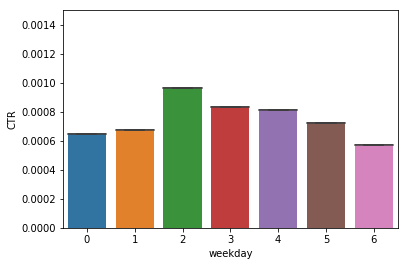

In [16]:
#weekday
feature_ctr('weekday',train_data,col_unique,0.0015)

/Users/qq666/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning:

remove_na is deprecated and is a private function. Do not use.

/Users/qq666/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



[0.0048478068335430944, 0.0076923076923076927, 0.0025559105431309905, 0.0030873211231173601, 0.0005455537370430987, 0.00057237992549125322]


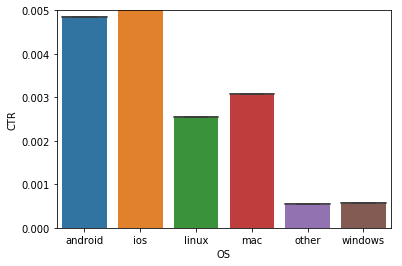

In [17]:
#OS
feature_ctr('OS',train_data,col_unique,0.005)

/Users/qq666/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning:

remove_na is deprecated and is a private function. Do not use.

/Users/qq666/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



[0.00044987919678392767, 0.00042751485614125092, 0.0006458233563658753, 0.00053440213760855043, 0.0, 0.0022240014233609108, 0.0041632879096536856, 0.0, 0.00035650623885918003]


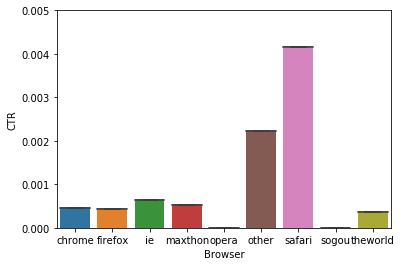

In [18]:
#browser
feature_ctr('Browser',train_data,col_unique,0.005)

/Users/qq666/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning:

remove_na is deprecated and is a private function. Do not use.

/Users/qq666/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



[0.00068863137336802832, 0.00054698247998541383, 0.00066936352259829458, 0.00045281651874660387, 0.00063579527392179723, 0.00080535561483867715, 0.0002603375710504621, 0.0006883200688320069, 0.00044799630041764815, 0.00050971492372480246, 0.00054980010838916421, 0.00050564769580234621, 0.00055209094726365064, 0.00081171720911686596, 0.00061006838791311424, 0.00061800130317666104, 0.00082773168143010674, 0.0010173932433939123, 0.0010054850498553004, 0.00098904569557339709, 0.00075065166463193322, 0.0009012980651481754, 0.00089752595020682125, 0.00089679790395470293]


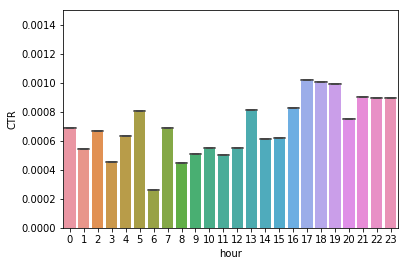

In [19]:
#hour
feature_ctr('hour',train_data,col_unique,0.0015)

/Users/qq666/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning:

remove_na is deprecated and is a private function. Do not use.

/Users/qq666/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



[0.0008303081795010427, 0.00082040864163769188, 0.00076933280275898663, 0.0007741293348938798, 0.0011101419395765603, 0.00079816103697081923, 0.00051623687897932595, 0.0005856515373352855, 0.00073885399856117909, 0.00064553713413002063, 0.00066297862165657707, 0.00072424812591464322, 0.0007803940990200051, 0.0010065078314581955, 0.000837772813198144, 0.00077275899890318078, 0.00076777917560867312, 0.00073407302221473441, 0.0011021250834355257, 0.00057685982060886936, 0.00082291827392892041, 0.00092733097285449333, 0.00063622754491017965, 0.00066935471018534753, 0.00094888402986921907, 0.00063738731902752911, 0.0023668639053254438, 0.00079086771618294411, 0.00059698946740011083, 0.00067578982936306812, 0.0015571126682237793, 0.00059902894255627721, 0.0011173184357541898, 0.001537751806858373, 0.0]


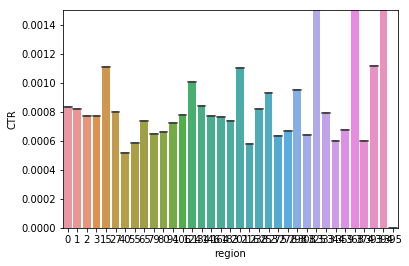

In [20]:
#region
feature_ctr('region',train_data,col_unique,0.0015)

/Users/qq666/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning:

remove_na is deprecated and is a private function. Do not use.

/Users/qq666/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



[0.00081863252170838029, 0.00050561415090879559, 0.0006882598009904107, 0.00047502968935558474, 0]


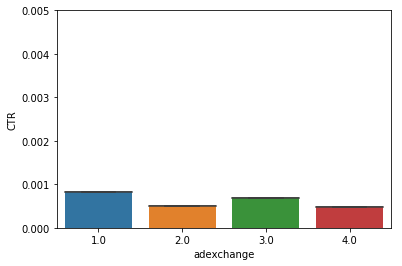

In [21]:
#adexchange
feature_ctr('adexchange',train_data,col_unique,0.005)

Data statistic

In [22]:
def data_statistic(data,col_unique):
    advertiser_col = sorted(col_unique['advertiser'])
    ADVERTISER_TRAIN = {}
    for i in advertiser_col:
        ADVERTISER_TRAIN[i] = data[data['advertiser']==i]
    IMPS_TRAIN = {}
    for i in advertiser_col:
        IMPS_TRAIN[i] = len(ADVERTISER_TRAIN[i][ADVERTISER_TRAIN[i]['bidprice']>=ADVERTISER_TRAIN[i]['payprice']])
    CLICKS_TRAIN = {}
    for i in advertiser_col:
        clicks = ADVERTISER_TRAIN[i]['click'].values
        click_count = 0
        for j in clicks:
            click_count += j
        CLICKS_TRAIN[i] = click_count
    COST_TRAIN = {}
    for i in advertiser_col:
        cost = ADVERTISER_TRAIN[i]['payprice'].values
        count = 0
        for j in cost:
            count += j
        COST_TRAIN[i] = count
    BIDS_TRAIN = {}
    for i in advertiser_col:
        bids = ADVERTISER_TRAIN[i]['bidprice'].values
        count = 0
        for j in bids:
            count += j
        BIDS_TRAIN[i] = count
    WR_TRAIN = {}
    for i in advertiser_col:
        WR_TRAIN[i] = IMPS_TRAIN[i] / BIDS_TRAIN[i]
    CTR_TRAIN = {}
    for i in advertiser_col:
        CTR_TRAIN[i] = CLICKS_TRAIN[i] / IMPS_TRAIN[i]
    CPM_TRAIN = {}
    for i in advertiser_col:
        CPM_TRAIN[i] = COST_TRAIN[i] / IMPS_TRAIN[i]
    eCPC_Train = {}
    for i in advertiser_col:
        eCPC_Train[i] = (COST_TRAIN[i]/1000) / CLICKS_TRAIN[i]
    df_Adv = pd.DataFrame(columns=['Adv'], data = advertiser_col)
    bids_arr = []
    imps_arr = []
    clicks_arr = []
    cost_arr = []
    wr_arr = []
    ctr_arr = []
    cpm_arr = []
    ecpc_arr = []
    for i in advertiser_col:
        bids_arr.append(BIDS_TRAIN[i])
        imps_arr.append(IMPS_TRAIN[i])
        clicks_arr.append(CLICKS_TRAIN[i])
        cost_arr.append(COST_TRAIN[i])
        wr_arr.append(WR_TRAIN[i])
        ctr_arr.append(CTR_TRAIN[i])
        cpm_arr.append(CPM_TRAIN[i])
        ecpc_arr.append(eCPC_Train[i])
    df_bids = pd.DataFrame(columns=['Bids'], data = bids_arr)
    df_imps = pd.DataFrame(columns=['Imps'], data = imps_arr)
    df_clicks = pd.DataFrame(columns=['Clicks'], data = clicks_arr)
    df_cost = pd.DataFrame(columns=['Cost'], data = cost_arr)
    df_wr = pd.DataFrame(columns=['Win Ratio'], data = wr_arr)
    df_ctr = pd.DataFrame(columns=['CTR'], data = ctr_arr)
    df_cpm = pd.DataFrame(columns=['CPM'], data = cpm_arr)
    df_ecpc = pd.DataFrame(columns=['eCPC'], data = ecpc_arr)
    result = df_Adv
    #result.insert(1,'Bids',df_bids)
    result.insert(1,'Imps',df_imps)
    result.insert(2,'Clicks',df_clicks)
    result.insert(3,'Cost',df_cost)
    #result.insert(5,'Win Ratio',df_wr)
    result.insert(4,'CTR',df_ctr)
    #result.insert(7,'CPM',df_cpm)
    result.insert(5,'eCPC',df_ecpc)
    return result

In [23]:
train_statistic_result = data_statistic(train_data,col_unique)
train_statistic_result

,Adv,Imps,Clicks,Cost,CTR,eCPC
0,1458,492353,385,33968736,0.000782,88.230483
1,2259,133673,43,12428238,0.000322,289.028791
2,2261,110122,36,9873779,0.000327,274.271639
3,2821,211366,131,18828044,0.000620,143.725527
4,2997,49829,217,3129267,0.004355,14.420585
5,3358,264956,202,22447231,0.000762,111.124906
6,3386,455041,320,34931823,0.000703,109.161947
7,3427,402806,272,30458711,0.000675,111.980555
8,3476,310835,187,23918779,0.000602,127.907909


In [24]:
def data_statistic_test(data,col_unique):
    advertiser_col = sorted(col_unique['advertiser'])
    ADVERTISER_TEST = {}
    for i in advertiser_col:
        ADVERTISER_TEST[i] = data[data['advertiser']==i]
    IMPS_TEST = {}
    for i in advertiser_col:
        IMPS_TEST[i] = len(ADVERTISER_TEST[i])
    imps_arr_test = []
    for i in advertiser_col:
        imps_arr_test.append(IMPS_TEST[i])
    df_Imps_test = pd.DataFrame(columns=['Imps'], data = imps_arr_test)
    return df_Imps_test

In [25]:
test_statistic_result = data_statistic_test(test_data,col_unique)
test_statistic_result

,Imps
0,61246
1,16882
2,13933
3,26370
4,6174
5,33100
6,56513
7,49804
8,39353


# Problem2: Basic Bidding Strategies

1. Constant Bidding:

In [26]:
def get_constant_bidding_clicks(data):
    clicks_arr = []
    clicks_price = {}
    clicks = data['click'].values
    payprice = data['payprice'].values
    for i in range(300):
        count = 0
        cost = 0
        for j in range(len(payprice)):
            if payprice[j] < i:
                count += clicks[j]
                cost += payprice[j]/1000
            if cost > 6250:
                break
        clicks_arr.append(count)
        clicks_price[count] = i
    clicks_arr.sort()
    return clicks_price[clicks_arr[len(clicks_arr)-1]],clicks_arr,clicks_price

In [27]:
def test_model(data):
    data = data[data['bidprice_pre'] > data['payprice']]
    click = data['click'].values
    payprice = data['payprice'].values
    cnt_click = 0
    cost = 0
    imps = 0
    for i in range(len(data)):
        cnt_click += click[i]
        cost += payprice[i]/1000
        imps += 1
        if cost > 6250:
            break
    ctr = cnt_click / imps
    cpc = cost / cnt_click
    result = {'ctr:':ctr,'cpc:':cpc,'click:':cnt_click,'imps:':imps}
    return result

In [28]:
constant_bidding_train,clicks_arr_train,clicks_price_train = get_constant_bidding_clicks(train_data)
print('Constant bidding for training dataset is:',constant_bidding_train)

Constant bidding for training dataset is: 26


In [29]:
constant_bidding_validation,clicks_arr_validation,clicks_price_validation = get_constant_bidding_clicks(validation_data)
print('Constant bidding for validation dataset is:',constant_bidding_validation)

Constant bidding for validation dataset is: 80


In [ ]:
bidprice_constant = np.zeros(len(validation_data))
bidprice_constant = bidprice_constant[bidprice_constant==0] = constant_bidding_validation
validation_data['bidprice_pre'] = constant_bidding_validation
print(test_model(validation_data))

2.Random bidding:

In [30]:
def find_random_bidding(clicks_arr,clicks_price):
    first = clicks_price[clicks_arr[len(clicks_arr)-1]]
    second = 0
    for i in range(len(clicks_arr)):
        if clicks_price[clicks_arr[len(clicks_arr)-i-1]] != first:
            second = clicks_price[clicks_arr[len(clicks_arr)-i-1]]
            break
    return min(first,second),max(first,second)

In [31]:
import random
class random_range:
    minn = 0
    maxx = 0
    def __init__(self, minn, maxx):
        self.minn = minn
        self.maxx = maxx
def get_random_bidding_clicks(data):
    clicks_arr = []
    clicks_price = {}
    clicks = data['click'].values
    payprice = data['payprice'].values
    for i in range(300):
        print(i)
        for j in range(i,300,10):
            r = random_range(i,j)
            count = 0
            cost = 0
            for k in range(len(payprice)):
                bidprice = random.randint(i,j)
                if payprice[k] < bidprice:
                    count += clicks[k]
                    cost += payprice[k]/1000
                if cost > 6250:
                    break
            clicks_arr.append(count)
            clicks_price[count] = r
    clicks_arr.sort()
    return clicks_price[clicks_arr[len(clicks_arr)-1]],clicks_arr,clicks_price

In [32]:
random_price_train,clicks_random_train,clicks_price_random_train = get_random_bidding_clicks(train_data)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [33]:
random_price_validation,clicks_random_validation,clicks_price_random_validation = get_random_bidding_clicks(validation_data)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [42]:
print("Random bidding for training dataset is:")
print(random_price_train.minn,"--",random_price_train.maxx)

Random bidding for training dataset is:
16 -- 36


In [44]:
print('Random bidding strategy for training dataset is:')
random_bidding_train = np.random.uniform(random_price_train.minn,random_price_train.maxx,size=len(train_data))
train_data['bidprice_pre'] = random_bidding_train
print(test_model(train_data))

Random bidding strategy for training dataset is:
{'ctr:': 0.00035232393377331272, 'cpc:': 45.289855072558311, 'click:': 138, 'imps:': 391685}


In [45]:
print("Random bidding for validation dataset is:")
print(random_price_validation.minn,"--",random_price_validation.maxx)

Random bidding for validation dataset is:
23 -- 113


In [46]:
print('Random bidding strategy for validation dataset is:')
random_bidding_validation = np.random.uniform(random_price_validation.minn,random_price_validation.maxx,size=len(validation_data))
validation_data['bidprice_pre'] = random_bidding_validation
print(test_model(validation_data))

Random bidding strategy for validation dataset is:
{'ctr:': 0.00044761898671850518, 'cpc:': 89.286114285759325, 'click:': 70, 'imps:': 156383}


In [47]:
np.sum(train_data['click'].values)

1793

In [48]:
np.sum(validation_data['click'].values)

202

In [ ]:
minn,maxx = find_random_bidding(clicks_arr_validation,clicks_price_validation)


In [ ]:
def plot(clicks_price,clicks_arr,title):
    price = []
    for i in clicks_arr:
        price.append(clicks_price[i])
    plt.plot(clicks_arr,price)
    plt.ylabel('Price')
    plt.xlabel('Clicks')
    plt.title(title)
    plt.show()

In [ ]:
plot(clicks_price_train,clicks_arr_train,'Constant bidding for training dataset')

In [ ]:
plot(clicks_price_validation,clicks_arr_validation,'Constant bidding for validation dataset')

# Problem 3: Linear Bidding Strategy

In [ ]:
corrmat = train_data.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=0.8, square=True,annot=True)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
cols = ['weekday','hour','region','advertiser','OS','Browser','adexchange']

In [ ]:
cols_len = {}
for col in cols:
    temp = col_unique[col]
    cols_len[col] = len(temp)

In [ ]:
cols_len

OneHot encoder

In [ ]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
for col in cols:
    print(col_unique[col])

In [ ]:
def one_hot_encoder(data):
    values = array(data)
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(values)
    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded),1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0,:])])
    return onehot_encoded 

In [ ]:
def create_one_hot_feature(data,name,dataframe):
    for i in range(len(data[0,:])):
        temp = data[:,i]
        df_temp = pd.DataFrame(columns=[name+str(i)], data = temp)
        dataframe.insert(0,name+str(i),df_temp)

In [ ]:
def add_onehot_into_dataset(data,cols):
    for col in cols:
        onehot = one_hot_encoder(data[col])
        create_one_hot_feature(onehot,col,data)

In [ ]:
add_onehot_into_dataset(train_data,cols)

In [ ]:
train_data.head()

Calculate base_bid with average training dataset

In [ ]:
def get_base_bid(data):
    payprice = data['payprice'].values
    return np.mean(payprice)

In [ ]:
base_bid = get_base_bid(train_data)
base_bid

Caculate avgCTR

In [ ]:
def get_avgCTR(data):
    clicks = data['click'].values
    return np.mean(clicks)

In [ ]:
avgCTR = get_avgCTR(train_data)
avgCTR

Calculate pCTR for testing dataset with logistic regression model

In [ ]:
not_contains = ['weekday','hour','region','slotvisibility','slotformat','advertiser','OS','Browser','adexchange','bidid','userid','useragent','IP','city','domain','url','urlid','slotid','creative','bidprice','payprice','keypage','usertag']

In [ ]:
def get_x_features(data):
    columns_train = data.columns
    columns_train_values = np.array(columns_train)
    train_cols = []
    for col in columns_train_values:
        if col not in not_contains:
            train_cols.append(col)
    return train_cols

In [ ]:
train_cols = get_x_features(train_data)
len(train_cols)

In [ ]:
print(train_cols)

In [ ]:
trainData = train_data.loc[:,train_cols]
trainData.head()

Training model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing

In [ ]:
train_x = trainData.drop('click',1)
len(train_x.columns)

In [ ]:
train_y = trainData['click']

In [ ]:
x = train_x.values
y = train_y.values

In [ ]:
logistic_model = LogisticRegression(C=1000.0, random_state=0)
logistic_model.fit(x, y)
print("Training End")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_jobs=2, random_state=0)
clf.fit(x, y)
print("Training End")

Preprocessing test dataset

In [ ]:
add_onehot_into_dataset(test_data,cols)

In [ ]:
test_data.head()

In [ ]:
len(test_data.columns)

In [ ]:
testData = test_data.loc[:,train_cols]
testData.head()

In [ ]:
test_x = testData.drop('click',1)
test_x.columns

In [ ]:
test_x = test_x.values

In [ ]:
pCTR = logistic_model.predict_proba(test_x)[:,1]
pCTR

Calculate bidprice for test dataset and save in local

In [ ]:
bid_price = base_bid * pCTR / avgCTR
bid_price

In [ ]:
def insert_bidprice_to_dataset_and_save(bid_price,data,filename):
    df_bidprice = pd.DataFrame(columns=['bidprice'], data = bid_price)
    df_bidid = data['bidid']
    #data.insert(0,'bidprice_pre',df_bidprice)
    result = df_bidprice
    result.insert(0,'bidid',df_bidid)
    result.to_csv(filename, index=False)

In [ ]:
insert_bidprice_to_dataset_and_save(bid_price,test_data,'Problem_3.csv')

In [ ]:
test_data['bidid']

Preprocessing validation dataset

In [ ]:
add_onehot_into_dataset(validation_data,cols)

In [ ]:
validation_data.head()

In [ ]:
len(validation_data.columns)

In [ ]:
validationData = validation_data.loc[:,train_cols]
validationData.head()

In [ ]:
validation_x = validationData.drop('click',1)
validation_x.columns

In [ ]:
validation_x = validation_x.values

In [ ]:
validation_y = validationData['click']

In [ ]:
validation_y = validation_y.values

In [ ]:
pCTR_validation = logistic_model.predict_proba(validation_x)[:,1]
pCTR_validation

In [ ]:
bid_price = base_bid * pCTR_validation / avgCTR
bid_price

In [ ]:
validation_data['bidprice_pre'] = bid_price

In [ ]:
insert_bidprice_to_dataset_and_save(bid_price,validation_data,'validation_bidprice.csv')

In [ ]:
print(test_model(validation_data))

Model accuracy

In [ ]:
y_pre = logistic_model.predict(validation_x)

In [ ]:
accuracy = sum(validation_y == y_pre)
print(accuracy/len(validation_y))

In [ ]:
len(validation_data['bidprice_pre'].unique())

# Problem 4: Your Best Bidding Strategy

In [ ]:
import xgboost as xgb

In [ ]:
len(train_x)

In [ ]:
len(train_y)

In [ ]:
len(test_x)

Training XGBoost model

In [ ]:
from xgboost.sklearn import XGBClassifier  
from xgboost.sklearn import XGBRegressor

In [ ]:
xclas = XGBClassifier(ooster='gbtree',learning_rate = 0.1,
 n_estimators=50,
 max_depth=9,
 min_child_weight=9,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.85,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1, seed=27,n_jobs=4) 
xclas.fit(x, y)  

Calculate pCTR based on XGBoost model

In [ ]:
pCTR = xclas.predict_proba(test_x)[:,1] 
pCTR

Calculate base_price

In [ ]:
def get_base_price(data):
    clicks_arr = []
    clicks_price = {}
    clicks = data['click'].values
    payprice = data['payprice'].values
    bidprice = data['bidprice_pre']
    n = int(max(bidprice))
    for i in range(n):
        print(i)
        count = 0
        cost = 0
        for j in range(len(payprice)):
            if payprice[j] < i:
                count += clicks[j]
                cost += payprice[j]/1000
            if cost > 6250:
                break
        if count not in clicks_arr:
            clicks_arr.append(count)
            clicks_price[count] = i
    clicks_arr.sort()
    return clicks_price[clicks_arr[len(clicks_arr)-1]]

In [ ]:
pCTR_validation = xclas.predict_proba(validation_x)[:,1]
pCTR_validation

In [ ]:
bid_price_validation = constant_bidding_validation * pCTR_validation / np.mean(validation_data['click'].values)
bid_price_validation

In [ ]:
max(bid_price_validation)

In [ ]:
validation_data['bidprice_pre'] = bid_price_validation
validation_data.head()

In [ ]:
base_price = get_base_price(validation_data)

Testing model

In [ ]:
bid_price_validation = base_price * pCTR_validation / avgCTR
validation_data['bidprice_pre'] = bid_price_validation
print(test_model(validation_data))

Get bid_price for testing dataset

In [ ]:
bid_price = base_price * pCTR / avgCTR
bid_price

In [ ]:
insert_bidprice_to_dataset_and_save(bid_price,test_data,'Problem_4.csv')